In [1]:
import cv2
from matplotlib import pyplot as plt

# 1.이미지 읽어오기. 원하는 파일을 주피터로 업로드하고, 인스턴스에 로드해 봅시다.

In [228]:
img = cv2.imread("puppy.jpeg")#이미지읽어와

## 읽어온 이미지를 화면에 표시해봅시다.

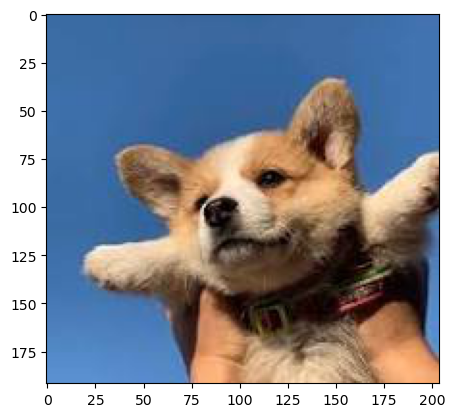

In [233]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#색상공간을 변환한다 bgr에서 rgb
plt.imshow(img)#cv2.imshow()하면 커널 사망
plt.show()

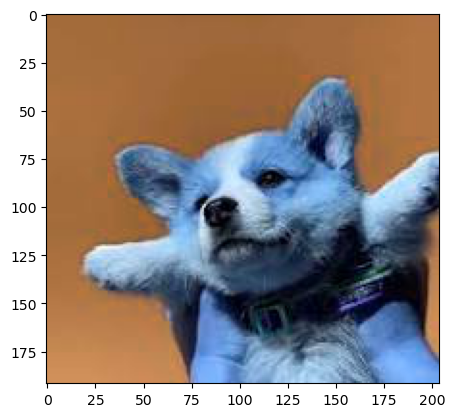

In [232]:
img = cv2.imread("puppy.jpeg")#이미지읽어와
plt.imshow(img)#색상공간 변환 안하면 이렇게 나옴
plt.show()#강쥐가 파래짐

In [234]:
big_img = cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_LINEAR)#이미지 확대하는거,(이미지,이미지 크기는 fx,fy로 지정,속성)
sml_img = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_LINEAR)#확대:바이큐빅보간,쌍선형보간 축소:영역보간

In [235]:
# my_img = cv2.resize(img,None,fx=5,fy=5,interpolation=cv2.INTER_LINEAR) 이건 그냥 내가 해본거

In [236]:
def show_image_in_actual_size(img,title="Image"):
    dpi = plt.rcParams["figure.dpi"]
    height,width = img.shape[:2]
    figsize = width/float(dpi),height/float(dpi)

    fig = plt.figure(figsize=figsize)
    ax  = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img,aspect = 'auto')
    plt.title(title)
    plt.show()



#실제 이미지 크기대로 각각 출력해주는 함수 작성

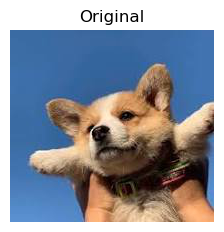

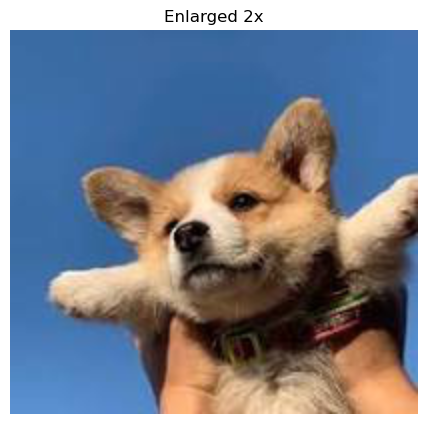

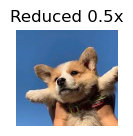

In [237]:
show_image_in_actual_size(img,"Original")
show_image_in_actual_size(big_img,"Enlarged 2x")
show_image_in_actual_size(sml_img,"Reduced 0.5x")

# 절대크기로 조정

In [37]:
img_shape = img.shape

In [38]:
resized_img1 = cv2.resize(img,(50,200),interpolation = cv2.INTER_AREA)
resized_img2 = cv2.resize(img,(600,300),interpolation = cv2.INTER_LINEAR)

print("원본:",img_shape)
print("조정본1:",resized_img1.shape)
print("조정본2:",resized_img2.shape)



원본: (192, 204, 3)
조정본1: (200, 50, 3)
조정본2: (300, 600, 3)


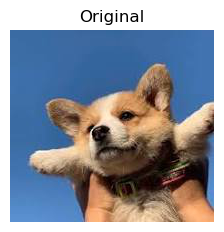

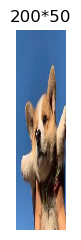

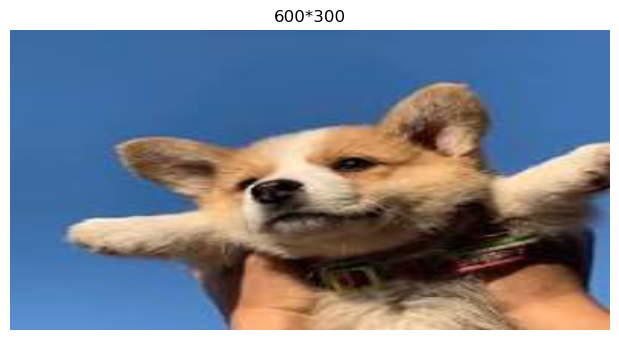

In [40]:
show_image_in_actual_size(img,"Original")
show_image_in_actual_size(resized_img1,"200*50")
show_image_in_actual_size(resized_img2,"600*300")


# 3.색공간변환
## cv2.COLOR(원본색공간병.목표색공간명) 명령어를 사용하면 각 색 공간을 서로 변환할 수 있습니다. 근데 대문자로 쓰세요
# 그레이스케일로 변환해봅시다.

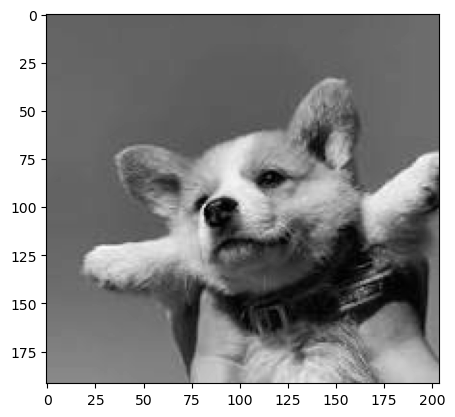

In [240]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #
plt.imshow(gray_img,cmap="gray")
plt.show()

In [44]:
gray_img.shape #명도만남아서 채도가 사라짐 고로 채널수가 줄어듬 그레이스케일로 변환하면 MNIST데이터셋같은건 연산속도도 줄고 성능도 오르니까 더 좋겠지

(192, 204)

# 4.이미지 반전
이미지를 상하좌우 바꿔봅시다.->데이터 수 부풀릴려고 씀


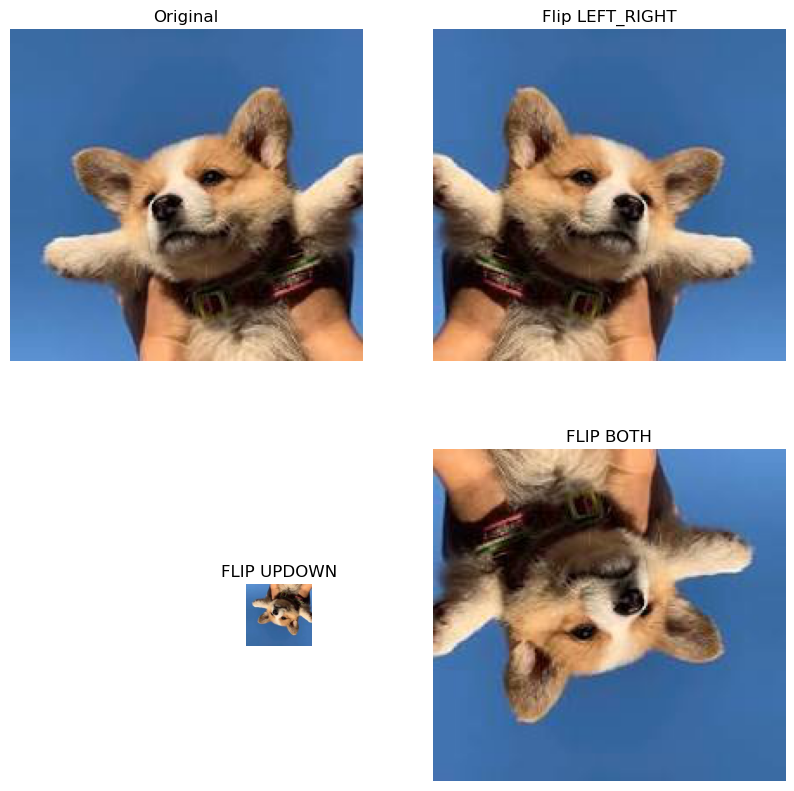

In [71]:
img_flip_lr = cv2.flip(img,1) #좌우 정수만쓰자
img_flip_ud = cv2.flip(img,0) #위아래 정수만쓰자
img_flip_both = cv2.flip(img,-40) # 상하좌우 정수만쓰자

plt.figure(figsize=(10,10))
#원본
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")
#좌우반전
plt.subplot(2,2,2)
plt.imshow(img_flip_lr)
plt.title("Flip LEFT_RIGHT")
plt.axis("off")
#상하반전
plt.subplot(2,10,14)#그냥 서브플랏 한번 해볼라고 일부러 
plt.imshow(img_flip_ud)
plt.title("FLIP UPDOWN")
plt.axis("off")
#상하좌우반전
plt.subplot(2,2,4)
plt.imshow(img_flip_both)
plt.title("FLIP BOTH")
plt.axis("off")


plt.show()





# 5.변환행렬 생성
1)회전행렬생성함수로 회전변환행렬을 계산
2)계산한 변환 행렬로 이미지 회전

In [75]:
rows,cols = img.shape[:2]

In [242]:
rows,cols

(192, 204)

In [101]:
M1 = cv2.getRotationMatrix2D((cols/2,rows/2),45,2**0.5)#(중앙 각도 확대비율)
M2 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
M3 = cv2.getRotationMatrix2D((cols/2,rows/2),135,1.5)

In [102]:
rotated_img1=cv2.warpAffine(img,M1,(cols,rows))
rotated_img2=cv2.warpAffine(img,M2,(cols,rows))
rotated_img3=cv2.warpAffine(img,M3,(cols,rows))

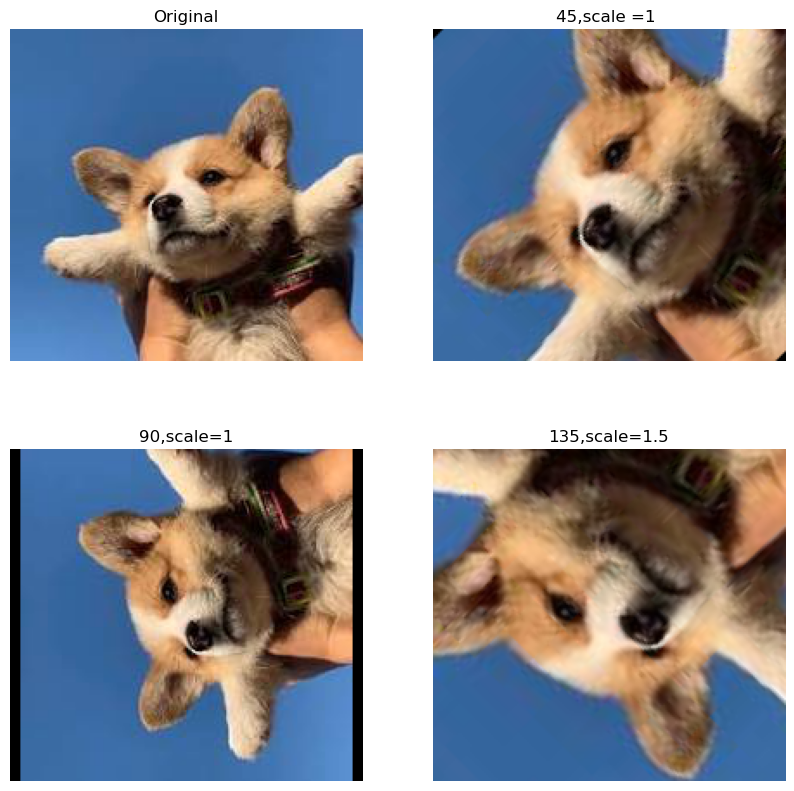

In [103]:

plt.figure(figsize=(10,10))
#원본
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")
#좌우반전
plt.subplot(2,2,2)
plt.imshow(rotated_img1)
plt.title("45,scale =1 ")
plt.axis("off")
#상하반전
plt.subplot(2,2,3)#그냥 서브플랏 한번 해볼라고 일부러 
plt.imshow(rotated_img2)
plt.title("90,scale=1")
plt.axis("off")
#상하좌우반전
plt.subplot(2,2,4)
plt.imshow(rotated_img3)
plt.title("135,scale=1.5")
plt.axis("off")




plt.show()


# 6.이미지 자르기

In [108]:
crop_img = img[100:200,100:300].copy()

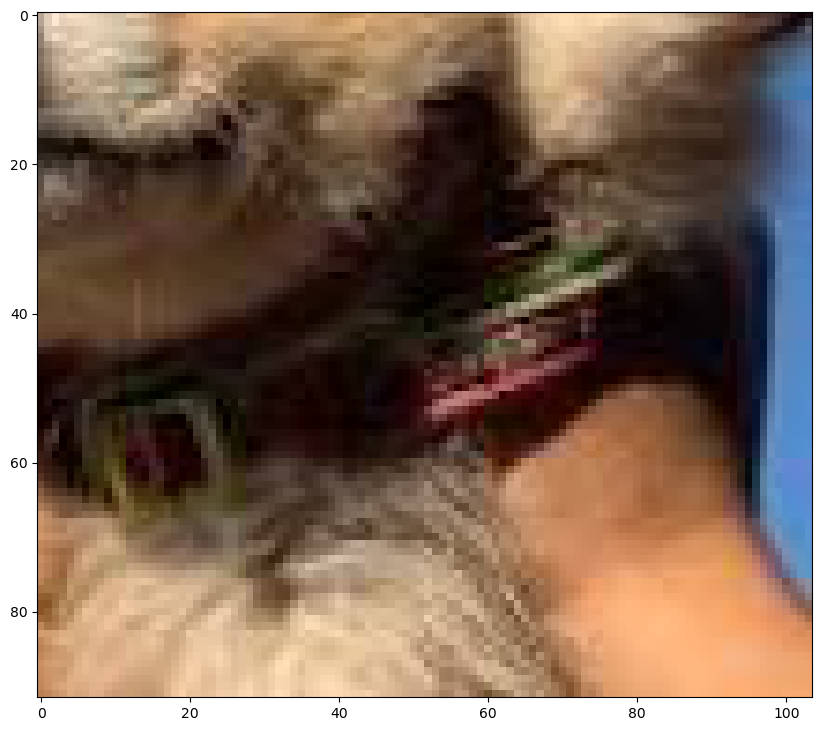

In [109]:
plt.figure(figsize = (10,10))
plt.imshow(crop_img)
plt.show()

# 7.가장자리검출
색보다 형체를 검출하는것에 중점
이미지 개체의 가장 바깥 둘레
밝기가 큰 폭으로 변하는 지점


In [112]:
sobel = cv2.Sobel(gray_img,cv2.CV_8U,1,0,3)
laplacian = cv2.Laplacian(gray_img,cv2.CV_8U,ksize = 3)
canny = cv2.Canny(gray_img,100,255)


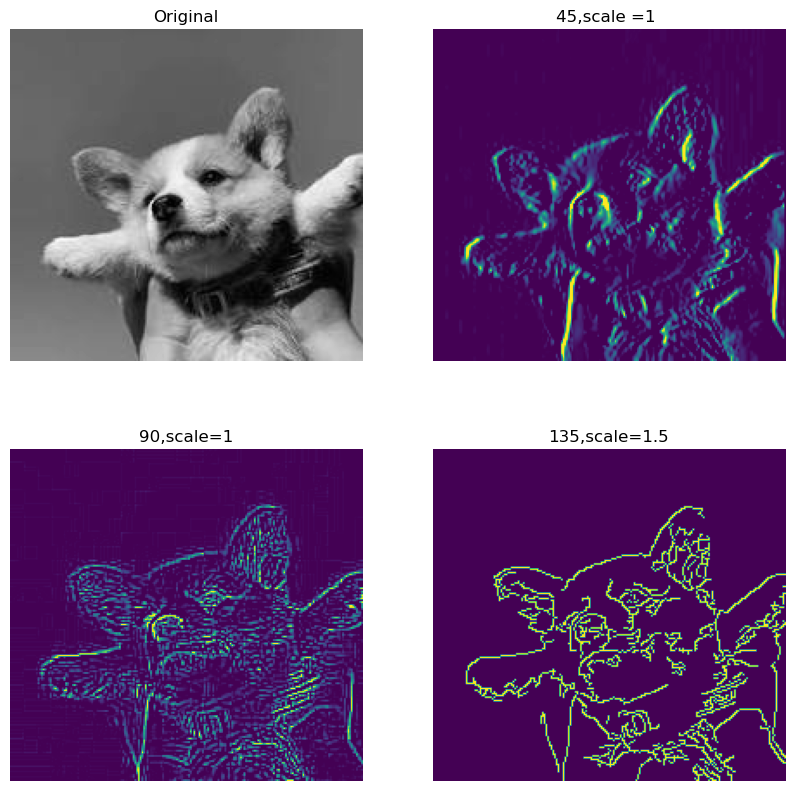

In [119]:
plt.figure(figsize=(10,10))
#원본
plt.subplot(2,2,1)
plt.imshow(gray_img,cmap="gray")
plt.title("Original")
plt.axis("off")
#소벨
plt.subplot(2,2,2)
plt.imshow(sobel)
plt.title("45,scale =1 ")
plt.axis("off")
#라플라스
plt.subplot(2,2,3)
plt.imshow(laplacian)
plt.title("90,scale=1")
plt.axis("off")
#캐니
plt.subplot(2,2,4)
plt.imshow(canny)
plt.title("135,scale=1.5")
plt.axis("off")

plt.show()

In [115]:
gray_img.shape

(192, 204)

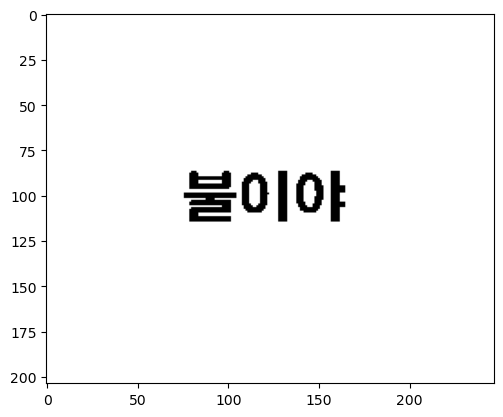

In [244]:
kor = cv2.imread("fire.png")#이미지읽어와
#그레이 스케일화 필요
kor = cv2.cvtColor(kor,cv2.COLOR_RGB2GRAY)#그레이로 변환
ret,binary =  cv2.threshold(kor,150,255,cv2.THRESH_BINARY)#이진화를 한다 150기준잡고 낮으면 0 높으면 255
binary = cv2.bitwise_not(binary)#하양 검정 바꿔
plt.imshow(binary,cmap ="gray")

In [245]:
kor.shape

(204, 247)

In [246]:
# 9.윤곽선 검출
# kor = cv2.imread("hwangwonjin.png")
# kor = cv2.cvtColor(kor,cv2.COLOR_RGB2GRAY)
# ret,binary =  cv2.threshold(kor,100,255,cv2.THRESH_BINARY)
# binary = cv2.bitwise_not(binary)
# kor = cv2.imread("hwangwonjin.png")

In [247]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)

In [248]:
for i in range(len(contours)):
    #윤곽선그리기
    cv2.drawContours(kor,[contours[i]],0,(0,0,255),1)
    cv2.putText(kor,str(i),tuple(contours[i][0][0]),cv2.FONT_HERSHEY_COMPLEX,0.8,(40,40,112),1)


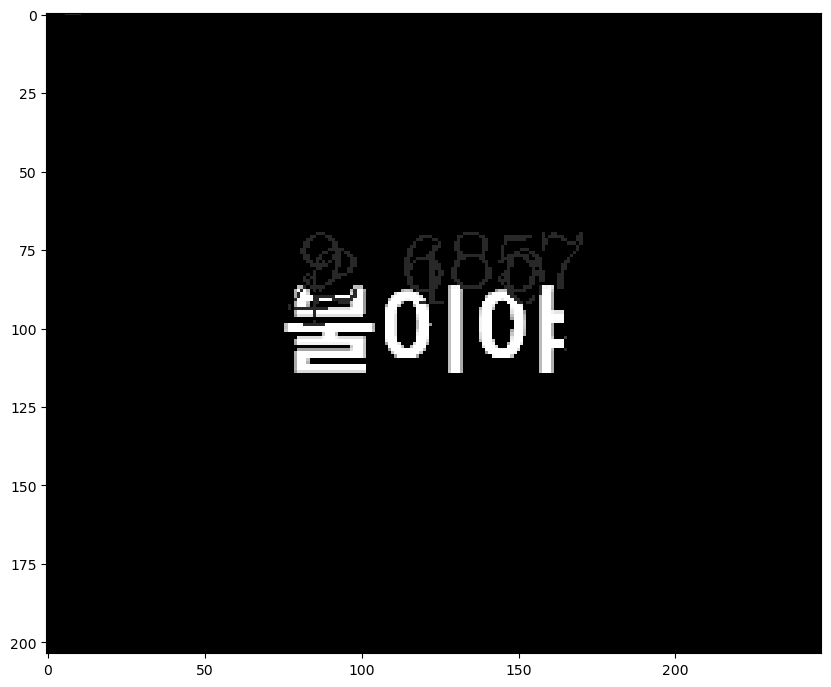

In [249]:
               

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(kor,cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
퀴즈
회전하고 그레이스케일 이진화(펜이 연할수도있고 그러니까 색깔을 고정시켜줘야함) 윤곽